<a href="https://colab.research.google.com/github/gtanawat/Backend-WaterServey/blob/master/Topgun_shortlist_model_imbalancePer_TG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

!gsutil cp gs://lmnugpot/data/shortlist.csv .

Copying gs://lmnugpot/data/shortlist.csv...
/ [1 files][ 13.4 MiB/ 13.4 MiB]                                                
Operation completed over 1 objects/13.4 MiB.                                     


In [128]:
jsk = pd.read_csv("shortlist.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [113]:
#Data Exploration
jsk.shape

(114475, 50)

In [114]:
jsk.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114475 entries, 0 to 114474
Data columns (total 50 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   _ID_                  114475 non-null  int64  
 1   ID_EMP                114475 non-null  int64  
 2   ID_REF_TRACK          114475 non-null  int64  
 3   SHORT_LIST_STATUS     114475 non-null  int64  
 4   AGE                   114475 non-null  int64  
 5   ID_CITY               114392 non-null  float64
 6   HEIGHT                114472 non-null  float64
 7   WEIGHT                114472 non-null  float64
 8   GENDER_NUM            114475 non-null  int64  
 9   EXP_STATUS            114466 non-null  object 
 10  EXP_COMPANY           114475 non-null  int64  
 11  EXP_YEAR              114475 non-null  int64  
 12  EXP_FULL_YEAR         113713 non-null  float64
 13  EXP_PT_YEAR           111911 non-null  float64
 14  degree1_count         114442 non-null  float64
 15  

In [129]:
jsk['ID_EMP'].value_counts()

5        26903
754      26336
279      21175
3349     18844
2371      4920
677       4419
1393      3742
21417     1995
869       1918
1807      1272
19246      891
945        646
16888      508
4490       424
46         312
1050        85
321         85
Name: ID_EMP, dtype: int64

In [116]:
jsk.isnull().sum()

_ID_                         0
ID_EMP                       0
ID_REF_TRACK                 0
SHORT_LIST_STATUS            0
AGE                          0
ID_CITY                     83
HEIGHT                       3
WEIGHT                       3
GENDER_NUM                   0
EXP_STATUS                   9
EXP_COMPANY                  0
EXP_YEAR                     0
EXP_FULL_YEAR              762
EXP_PT_YEAR               2564
degree1_count               33
degree1_GPA             108789
degree1_school          108503
degree1_major           108507
degree1_fac_major       108507
degree2_count               33
degree2_GPA               6264
degree2_school            2356
degree2_major             2360
degree2_fac_major         2356
degree3_count               33
degree3_GPA              99458
degree3_school           98263
degree3_major            98264
degree3_fac_major        98263
degree4_count               33
degree4_GPA             109948
degree4_school          109720
degree4_

In [117]:
# Remove NaN
jsk=jsk.fillna(0)

In [ ]:
#Data Exploration
jsk['SHORT_LIST_STATUS'].value_counts()

0    93504
1    20971
Name: SHORT_LIST_STATUS, dtype: int64

In [ ]:
ID_EMP = jsk['ID_EMP'].unique()

In [130]:
for id in ID_EMP:
  jsk_emp = jsk[jsk['ID_EMP'] == id] 
  x = jsk_emp['SHORT_LIST_STATUS'].value_counts()
  print("\n\n ID", id)
  print(x, "\n")



 ID 5
0    24826
1     2077
Name: SHORT_LIST_STATUS, dtype: int64 



 ID 754
0    20240
1     6096
Name: SHORT_LIST_STATUS, dtype: int64 



 ID 19246
1    839
0     52
Name: SHORT_LIST_STATUS, dtype: int64 



 ID 279
0    17625
1     3550
Name: SHORT_LIST_STATUS, dtype: int64 



 ID 1393
0    2234
1    1508
Name: SHORT_LIST_STATUS, dtype: int64 



 ID 2371
0    3393
1    1527
Name: SHORT_LIST_STATUS, dtype: int64 



 ID 3349
0    17735
1     1109
Name: SHORT_LIST_STATUS, dtype: int64 



 ID 945
0    472
1    174
Name: SHORT_LIST_STATUS, dtype: int64 



 ID 21417
0    1206
1     789
Name: SHORT_LIST_STATUS, dtype: int64 



 ID 869
0    1529
1     389
Name: SHORT_LIST_STATUS, dtype: int64 



 ID 677
0    3561
1     858
Name: SHORT_LIST_STATUS, dtype: int64 



 ID 4490
1    412
0     12
Name: SHORT_LIST_STATUS, dtype: int64 



 ID 16888
1    456
0     52
Name: SHORT_LIST_STATUS, dtype: int64 



 ID 1050
1    85
Name: SHORT_LIST_STATUS, dtype: int64 



 ID 1807
1    849
0  

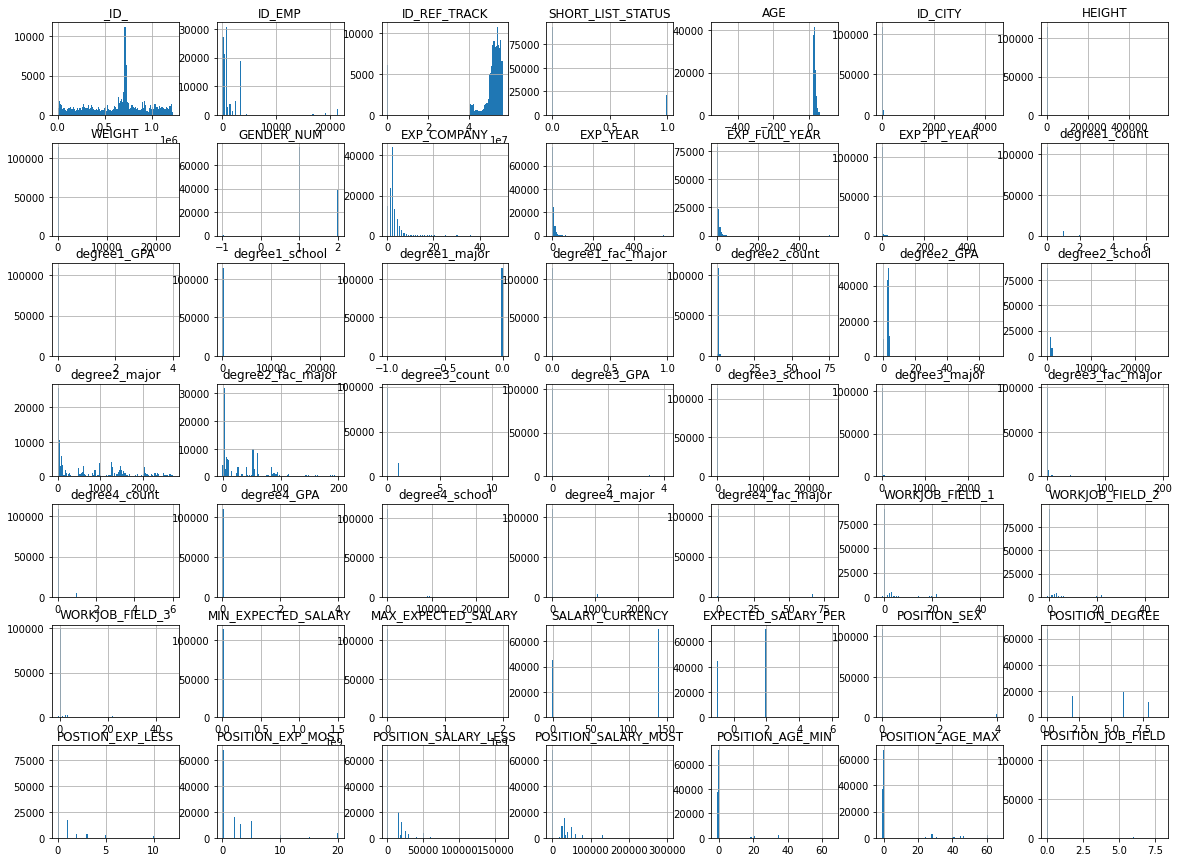

In [ ]:
jsk.hist(bins=100, figsize=(20,15))
plt.show()

In [ ]:
jsk['degree2_count'].value_counts()

1.0     108968
2.0       2816
0.0       2356
3.0        263
4.0         26
16.0        13
8.0          9
6.0          7
5.0          6
7.0          4
15.0         3
14.0         2
77.0         1
18.0         1
Name: degree2_count, dtype: int64

In [ ]:
jsk.describe()

,_ID_,ID_EMP,ID_REF_TRACK,SHORT_LIST_STATUS,AGE,ID_CITY,HEIGHT,WEIGHT,GENDER_NUM,EXP_COMPANY,EXP_YEAR,EXP_FULL_YEAR,EXP_PT_YEAR,degree1_count,degree1_GPA,degree1_school,degree1_major,degree1_fac_major,degree2_count,degree2_GPA,degree2_school,degree2_major,degree2_fac_major,degree3_count,degree3_GPA,degree3_school,degree3_major,degree3_fac_major,degree4_count,degree4_GPA,degree4_school,degree4_major,degree4_fac_major,WORKJOB_FIELD_1,WORKJOB_FIELD_2,WORKJOB_FIELD_3,MIN_EXPECTED_SALARY,MAX_EXPECTED_SALARY,SALARY_CURRENCY,EXPECTED_SALARY_PER,POSITION_SEX,POSITION_DEGREE,POSTION_EXP_LESS,POSITION_EXP_MOST,POSITION_SALARY_LESS,POSITION_SALARY_MOST,POSITION_AGE_MIN,POSITION_AGE_MAX,POSITION_JOB_FIELD
count,1.144750e+05,114475.000000,1.144750e+05,114475.000000,114475.00000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,1.144750e+05,1.144750e+05,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.00000
mean,6.398286e+05,1606.834654,4.957948e+07,0.183193,29.77140,10.496781,184.504606,61.441731,1.325652,2.223665,5.211618,4.767705,0.378249,0.054789,0.131035,5.735217,-0.000262,0.000009,1.013680,2.528715,322.620162,781.483512,35.222677,0.151020,0.410907,41.308888,73.969583,3.462031,0.042647,0.115384,204.791483,38.248570,2.387561,1.818362,1.588128,1.329522,2.733469e+04,6.577285e+04,84.697331,0.830819,0.167775,2.098511,0.618065,2.096135,8929.294597,17282.514077,0.794715,3.104748,0.06501
std,3.224015e+05,3464.724252,1.215962e+07,0.386826,7.38982,34.510115,3297.540822,209.303618,0.502358,2.047131,12.922602,12.040216,4.817277,0.239794,0.610500,241.886958,0.016186,0.002956,0.387721,0.896488,1085.576264,816.587650,42.992753,0.391025,1.113089,588.030227,327.839646,16.635785,0.209239,0.586336,1372.013064,206.081494,12.471812,5.914184,5.588056,5.220176,4.433815e+06,7.831383e+06,68.840443,1.464581,0.780413,2.937474,1.660606,4.109293,12701.425113,26070.479389,5.719015,11.920948,0.62127
min,1.500000e+01,5.000000,-4.000000e+00,0.000000,-514.00000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.00000
25%,3.799805e+05,279.000000,5.064985e+07,0.000000,25.00000,-1.000000,158.000000,49.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.340000,3.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.00000
50%,7.115550e+05,754.000000,5.280965e+07,0.000000,28.00000,-1.000000,164.000000,56.000000,1.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.680000,27.000000,540.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+04,1.950000e+04,140.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,8.595510e+05,1807.000000,5.458552e+07,0.000000,33.00000,19.000000,170.000000,67.000000,2.000000,3.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.

In [119]:
for col in ['ID_CITY', 'GENDER_NUM', 'degree1_school', 'degree2_school', 'degree3_school', 'degree4_school', 
            'degree1_major', 'degree1_fac_major', 'degree2_major', 
            'degree3_major', 'degree3_fac_major', 'degree4_major', 'degree4_fac_major', 'WORKJOB_FIELD_1', 'WORKJOB_FIELD_2', 'WORKJOB_FIELD_3',
            'POSITION_SEX', 'POSITION_DEGREE' , 'POSITION_JOB_FIELD']:
   jsk[col] = jsk[col].astype('category')

In [120]:
jsk.drop(['WEIGHT','HEIGHT','ID_REF_TRACK','_ID_'], axis=1, inplace=True)

In [ ]:
jsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114475 entries, 0 to 114474
Data columns (total 46 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ID_EMP                114475 non-null  int64   
 1   SHORT_LIST_STATUS     114475 non-null  int64   
 2   AGE                   114475 non-null  int64   
 3   ID_CITY               114392 non-null  category
 4   GENDER_NUM            114475 non-null  category
 5   EXP_STATUS            114466 non-null  object  
 6   EXP_COMPANY           114475 non-null  int64   
 7   EXP_YEAR              114475 non-null  int64   
 8   EXP_FULL_YEAR         113713 non-null  float64 
 9   EXP_PT_YEAR           111911 non-null  float64 
 10  degree1_count         114442 non-null  float64 
 11  degree1_GPA           5686 non-null    float64 
 12  degree1_school        5972 non-null    category
 13  degree1_major         5968 non-null    category
 14  degree1_fac_major     5968 non-null 

In [ ]:
jsk.head(5)

,ID_EMP,SHORT_LIST_STATUS,AGE,ID_CITY,GENDER_NUM,EXP_STATUS,EXP_COMPANY,EXP_YEAR,EXP_FULL_YEAR,EXP_PT_YEAR,degree1_count,degree1_GPA,degree1_school,degree1_major,degree1_fac_major,degree2_count,degree2_GPA,degree2_school,degree2_major,degree2_fac_major,degree3_count,degree3_GPA,degree3_school,degree3_major,degree3_fac_major,degree4_count,degree4_GPA,degree4_school,degree4_major,degree4_fac_major,WORKJOB_FIELD_1,WORKJOB_FIELD_2,WORKJOB_FIELD_3,MIN_EXPECTED_SALARY,MAX_EXPECTED_SALARY,SALARY_CURRENCY,EXPECTED_SALARY_PER,POSITION_SEX,POSITION_DEGREE,POSTION_EXP_LESS,POSITION_EXP_MOST,POSITION_SALARY_LESS,POSITION_SALARY_MOST,POSITION_AGE_MIN,POSITION_AGE_MAX,POSITION_JOB_FIELD
0,5,0,34,39.0,2,True,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,2.0,5.0,25000.0,60000.0,-1.0,-1.0,0.0
1,5,0,23,-1.0,2,True,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.46,59.0,929.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,20000.0,30000.0,-1.0,-1.0,6.0
2,5,0,25,-1.0,1,True,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.72,47.0,1430.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,15000.0,30000.0,-1.0,-1.0,0.0
3,5,0,23,-1.0,1,False,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,15000.0,30000.0,-1.0,-1.0,0.0
4,754,0,48,1.0,2,True,4,7,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
jsk.describe()

,ID_EMP,SHORT_LIST_STATUS,AGE,EXP_COMPANY,EXP_YEAR,EXP_FULL_YEAR,EXP_PT_YEAR,degree1_count,degree1_GPA,degree2_count,degree2_GPA,degree2_fac_major,degree3_count,degree3_GPA,degree4_count,degree4_GPA,MIN_EXPECTED_SALARY,MAX_EXPECTED_SALARY,SALARY_CURRENCY,EXPECTED_SALARY_PER,POSTION_EXP_LESS,POSITION_EXP_MOST,POSITION_SALARY_LESS,POSITION_SALARY_MOST,POSITION_AGE_MIN,POSITION_AGE_MAX
count,114475.000000,114475.000000,114475.00000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,1.144750e+05,1.144750e+05,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000,114475.000000
mean,1606.834654,0.183193,29.77140,2.223665,5.211618,4.767705,0.378249,0.054789,0.131035,1.013680,2.528715,35.222677,0.151020,0.410907,0.042647,0.115384,2.733469e+04,6.577285e+04,84.697331,0.830819,0.618065,2.096135,8929.294597,17282.514077,0.794715,3.104748
std,3464.724252,0.386826,7.38982,2.047131,12.922602,12.040216,4.817277,0.239794,0.610500,0.387721,0.896488,42.992753,0.391025,1.113089,0.209239,0.586336,4.433815e+06,7.831383e+06,68.840443,1.464581,1.660606,4.109293,12701.425113,26070.479389,5.719015,11.920948
min,5.000000,0.000000,-514.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,279.000000,0.000000,25.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.340000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
50%,754.000000,0.000000,28.00000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.680000,10.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+04,1.950000e+04,140.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1807.000000,0.000000,33.00000,3.000000,7.000000,7.000000,0.000000,0.000000,0.000000,1.000000,3.020000,57.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+04,2.600000e+04,140.000000,2.000000,1.000000,3.000000,15000.000000,30000.000000,0.000000,0.000000
max,21417.000000,1.000000,128.00000,50.000000,566.000000,562.000000,542.000000,7.000000,4.000000,77.000000,71.500000,199.000000,11.000000,4.130000,6.000000,4.000000,1.500018e+09,2.000025e+09,151.000000,6.000000,12.000000,20.000000,160000.000000,300000.000000,66.000000,66.000000


In [ ]:
#drop unnecessary column
#jsk.drop(['EXP_PT_YEAR','MAX_EXPECTED_SALARY'], axis=1, inplace=True)

In [121]:
jsk_origin = jsk

In [ ]:
jsk.shape

(114475, 46)

In [ ]:
jsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114475 entries, 0 to 114474
Data columns (total 46 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ID_EMP                114475 non-null  int64   
 1   SHORT_LIST_STATUS     114475 non-null  int64   
 2   AGE                   114475 non-null  int64   
 3   ID_CITY               114475 non-null  category
 4   GENDER_NUM            114475 non-null  category
 5   EXP_STATUS            114475 non-null  object  
 6   EXP_COMPANY           114475 non-null  int64   
 7   EXP_YEAR              114475 non-null  int64   
 8   EXP_FULL_YEAR         114475 non-null  float64 
 9   EXP_PT_YEAR           114475 non-null  float64 
 10  degree1_count         114475 non-null  float64 
 11  degree1_GPA           114475 non-null  float64 
 12  degree1_school        114475 non-null  category
 13  degree1_major         114475 non-null  category
 14  degree1_fac_major     114475 non-nul

In [122]:
jsk_origin = jsk

In [123]:
#import Scikit-learn
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix

In [124]:
jsk_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114475 entries, 0 to 114474
Data columns (total 46 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ID_EMP                114475 non-null  int64   
 1   SHORT_LIST_STATUS     114475 non-null  int64   
 2   AGE                   114475 non-null  int64   
 3   ID_CITY               114475 non-null  category
 4   GENDER_NUM            114475 non-null  category
 5   EXP_STATUS            114475 non-null  object  
 6   EXP_COMPANY           114475 non-null  int64   
 7   EXP_YEAR              114475 non-null  int64   
 8   EXP_FULL_YEAR         114475 non-null  float64 
 9   EXP_PT_YEAR           114475 non-null  float64 
 10  degree1_count         114475 non-null  float64 
 11  degree1_GPA           114475 non-null  float64 
 12  degree1_school        114475 non-null  category
 13  degree1_major         114475 non-null  category
 14  degree1_fac_major     114475 non-nul

In [131]:
for id in ID_EMP:
  jsk = jsk_origin[jsk_origin['ID_EMP'] == id]
  jsk.drop(['ID_EMP'], axis=1, inplace=True)
  X = jsk.drop('SHORT_LIST_STATUS',axis=1)
  y = jsk['SHORT_LIST_STATUS']

  X, y = make_classification(n_classes=2, class_sep=2, weights=[0.2, 0.8],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=45, n_clusters_per_class=2,
                           n_samples=50000, random_state=10)
  # Apply the random over-sampling
  ros = RandomOverSampler()
  X_resampled, y_resampled = ros.fit_sample(X, y)

  # Split dataset into training set and test set
  #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
  X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=10)
  # Create Decision Tree classifier object
  decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=None)

  # Train Decision Tree Classifier
  decision_tree_classifier.fit(X_train,y_train)
  y_pred = decision_tree_classifier.predict(X_test)
  score = decision_tree_classifier.score(X_test, y_test)
  print("\n\n ID", id)
  print("\n Accuracy", score)
  cm = confusion_matrix(y_test, y_pred)
  recall = np.diag(cm) / np.sum(cm, axis=1)
  print("\nRecall:\n", pd.Series(recall)) 

  cm = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix (predict/actual):\n", pd.DataFrame(cm))

  print("\n \n ",pd.Series(decision_tree_classifier.feature_importances_).sort_values(ascending=False).head(10))


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 5

 Accuracy 0.9936875

Recall:
 0    0.999126
1    0.988238
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  8001     7
1    94  7898

 
  22    0.890152
23    0.028784
10    0.013161
33    0.006824
1     0.002877
15    0.002746
44    0.002668
34    0.002182
6     0.002138
41    0.002113
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 754

 Accuracy 0.99425

Recall:
 0    0.998252
1    0.990240
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  7994    14
1    78  7914

 
  22    0.895659
23    0.033697
10    0.010634
33    0.006685
6     0.002698
15    0.002101
9     0.001998
21    0.001974
35    0.001897
34    0.001868
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 19246

 Accuracy 0.9934375

Recall:
 0    0.998626
1    0.988238
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  7997    11
1    94  7898

 
  22    0.890823
23    0.033076
10    0.010830
33    0.005121
25    0.003320
17    0.002905
44    0.002472
9     0.002308
11    0.002101
29    0.002087
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 279

 Accuracy 0.9921875

Recall:
 0    0.997128
1    0.987237
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  7985    23
1   102  7890

 
  22    0.894383
23    0.033763
10    0.009563
33    0.007813
20    0.002518
34    0.002495
9     0.002173
8     0.002168
15    0.002001
6     0.001997
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 1393

 Accuracy 0.9933125

Recall:
 0    0.998252
1    0.988363
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  7994    14
1    93  7899

 
  22    0.891764
23    0.032050
10    0.010758
33    0.006093
8     0.003245
15    0.002964
17    0.002839
31    0.002767
34    0.002542
42    0.002302
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 2371

 Accuracy 0.992875

Recall:
 0    0.998626
1    0.987112
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  7997    11
1   103  7889

 
  22    0.890535
23    0.030437
10    0.011200
33    0.007534
6     0.003162
26    0.002709
41    0.002621
30    0.002458
15    0.002336
19    0.002294
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 3349

 Accuracy 0.993375

Recall:
 0    0.999001
1    0.987738
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  8000     8
1    98  7894

 
  22    0.890465
23    0.030809
33    0.009278
10    0.007672
4     0.003196
15    0.002803
0     0.002764
16    0.002567
26    0.002455
42    0.002446
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 945

 Accuracy 0.99275

Recall:
 0    0.997627
1    0.987863
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  7989    19
1    97  7895

 
  22    0.892870
23    0.032100
10    0.008954
33    0.008847
12    0.003130
15    0.002861
6     0.002653
8     0.002629
1     0.002338
42    0.002273
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 21417

 Accuracy 0.99375

Recall:
 0    0.998252
1    0.989239
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  7994    14
1    86  7906

 
  22    0.889700
23    0.031130
10    0.009449
33    0.009099
34    0.002668
24    0.002357
4     0.002286
0     0.002226
12    0.002111
38    0.002079
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 869

 Accuracy 0.993

Recall:
 0    0.999126
1    0.986862
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  8001     7
1   105  7887

 
  22    0.892069
23    0.031787
10    0.011962
33    0.007715
14    0.002966
41    0.002811
26    0.002676
8     0.002181
7     0.002112
32    0.002045
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 677

 Accuracy 0.9935

Recall:
 0    0.999001
1    0.987988
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  8000     8
1    96  7896

 
  22    0.896001
23    0.031075
33    0.009044
10    0.008462
43    0.002596
30    0.002512
6     0.002339
8     0.002289
32    0.002091
15    0.002078
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 4490

 Accuracy 0.9944375

Recall:
 0    0.999001
1    0.989865
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  8000     8
1    81  7911

 
  22    0.894845
23    0.031793
10    0.009531
33    0.006947
17    0.003095
8     0.002420
29    0.002351
41    0.002283
35    0.002268
15    0.002168
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 16888

 Accuracy 0.994

Recall:
 0    0.999001
1    0.988989
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  8000     8
1    88  7904

 
  22    0.890471
23    0.030140
10    0.013202
33    0.006067
44    0.003062
25    0.002931
34    0.002728
17    0.002404
24    0.002401
9     0.002385
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 1050

 Accuracy 0.9926875

Recall:
 0    0.998876
1    0.986486
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  7999     9
1   108  7884

 
  22    0.890124
23    0.028591
10    0.013833
33    0.006680
15    0.003380
2     0.002749
4     0.002541
35    0.002235
8     0.002139
42    0.002121
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 1807

 Accuracy 0.993375

Recall:
 0    0.998377
1    0.988363
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  7995    13
1    93  7899

 
  22    0.892867
23    0.030508
10    0.010664
33    0.008395
1     0.002880
37    0.002721
8     0.002624
19    0.002574
43    0.002085
20    0.001961
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 46

 Accuracy 0.9935

Recall:
 0    0.997752
1    0.989239
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  7990    18
1    86  7906

 
  22    0.891840
23    0.030404
10    0.012167
33    0.007426
9     0.002691
1     0.002507
30    0.002426
39    0.002343
3     0.002024
6     0.002003
dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)




 ID 321

 Accuracy 0.9930625

Recall:
 0    0.998501
1    0.987613
dtype: float64
Confusion Matrix (predict/actual):
       0     1
0  7996    12
1    99  7893

 
  22    0.892085
23    0.030395
10    0.011038
33    0.009655
4     0.002559
6     0.002451
24    0.002323
1     0.002089
41    0.002089
15    0.002055
dtype: float64


array([[ 0.1651987 , -0.51376302,  0.22030274, ..., -0.58807313,
        -0.08662579, -2.21228909],
       [ 0.24976081,  0.02828069, -0.51183196, ...,  0.87467859,
         0.87473644, -1.48732678],
       [ 0.38524136, -0.73043526,  0.97174816, ...,  0.49271794,
        -0.25246955, -2.35675771],
       ...,
       [ 1.37902031,  0.6026811 , -1.59374802, ..., -0.99938735,
         0.18288017, -1.07893635],
       [ 0.80410144,  0.32173315, -0.15243739, ..., -0.87799215,
        -0.26497332, -2.59858535],
       [-0.62490094, -0.1116542 ,  0.2750505 , ...,  1.60708058,
         0.6763112 , -2.01062919]])

In [ ]:
#Create Train and Evaluate dataset
X = jsk.drop('SHORT_LIST_STATUS',axis=1)
y = jsk['SHORT_LIST_STATUS']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # 70% training and 30% test

print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)

Training features/target: (68, 37) (68,)
Testing features/target: (17, 37) (17,)


In [ ]:
# Create Decision Tree classifer object
decision_tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=None)

# Train Decision Tree Classifer
decision_tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
decision_tree_classifier.score(X_test, y_test)

0.6470588235294118

In [ ]:
y_pred = decision_tree_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (predict/actual):\n", pd.DataFrame(cm))

Confusion Matrix (predict/actual):
    0  1
0  8  4
1  2  3


In [ ]:
recall = np.diag(cm) / np.sum(cm, axis=1)
print("\nRecall:\n", pd.Series(recall))


Recall:
 0    0.666667
1    0.600000
dtype: float64


In [ ]:
dfoutput=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
dfoutput

,Actual,Predicted
88698,0,0
88699,1,0
88700,0,0
88701,0,1
88702,0,0
88703,0,1
88704,0,1
88705,0,0
88706,0,1
88707,0,0


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6470588235294118


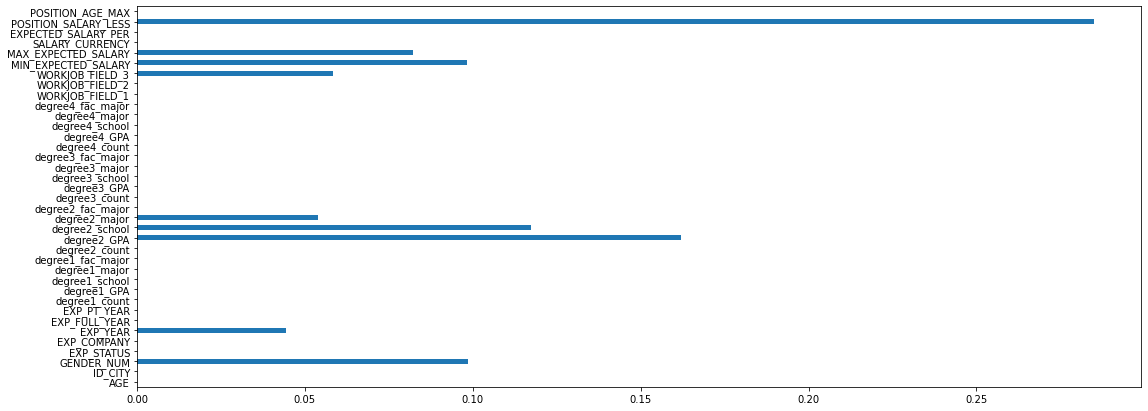

In [ ]:
%matplotlib inline
pd.Series(decision_tree_classifier.feature_importances_, index=X.columns).plot.barh(figsize=(18,7));

In [ ]:
pd.Series(decision_tree_classifier.feature_importances_, index=X.columns).sort_values(ascending=False).head(30)

POSITION_SALARY_LESS    0.361019
degree2_fac_major       0.137521
POSTION_EXP_LESS        0.122584
GENDER_NUM              0.103639
WORKJOB_FIELD_3         0.095984
degree2_school          0.087939
degree2_major           0.051887
AGE                     0.039426
degree2_GPA             0.000000
degree2_count           0.000000
degree1_fac_major       0.000000
degree1_major           0.000000
degree1_school          0.000000
degree1_count           0.000000
degree1_GPA             0.000000
degree3_GPA             0.000000
EXP_PT_YEAR             0.000000
EXP_FULL_YEAR           0.000000
EXP_YEAR                0.000000
EXP_COMPANY             0.000000
EXP_STATUS              0.000000
ID_CITY                 0.000000
degree3_count           0.000000
POSITION_JOB_FIELD      0.000000
degree3_school          0.000000
POSITION_AGE_MAX        0.000000
POSITION_AGE_MIN        0.000000
POSITION_SALARY_MOST    0.000000
POSITION_EXP_MOST       0.000000
POSITION_DEGREE         0.000000
dtype: flo

In [ ]:
# Figure out where graphviz executable lives
dotpath = !which dot

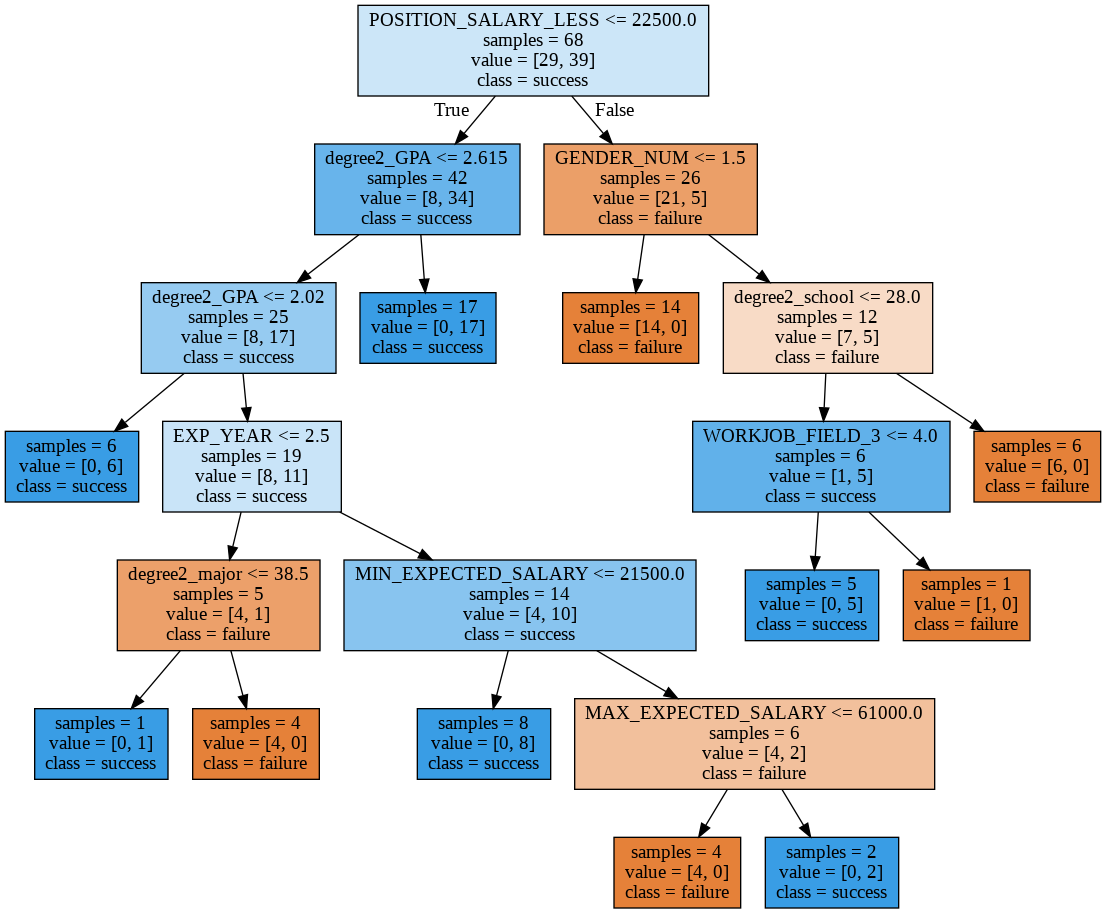

In [ ]:
# Generate cut point diagram
from sklearn.tree import export_graphviz
import sys, subprocess
from IPython.display import Image

export_graphviz(decision_tree_classifier, feature_names=X.columns, class_names=['failure','success'],
                out_file='ml-good.dot', impurity=False, filled=True)
subprocess.check_call([dotpath[0],'-Tpng','ml-good.dot','-o','ml-good.png'])
Image('ml-good.png')

In [ ]:
decision_tree_classifier.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
#Quick Comparison
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier

classifiers = {
    "Dummy"        : DummyClassifier(strategy='uniform', random_state=2),
    "KNN(3)"       : KNeighborsClassifier(3), 
    "RBF SVM"      : SVC(gamma=2, C=1), 
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=None), 
    "Random Forest": RandomForestClassifier(max_depth=None, n_estimators=10, max_features=10), 
    "Neural Net"   : MLPClassifier(alpha=1), 
    "AdaBoost"     : AdaBoostClassifier(),
    "Naive Bayes"  : GaussianNB(), 
    "QDA"          : QuadraticDiscriminantAnalysis(),
    "Linear SVC"   : LinearSVC(),
    "Linear SVM"   : SVC(kernel="linear"), 
    "Gaussian Proc": GaussianProcessClassifier(1.0 * RBF(1.0)),
}

In [ ]:
from time import time
nfast = 10      # Don't run the very slow ones
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    classifier.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test, y_test)
    score_time = time()-start
    print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))

Dummy          | score = 0.647 | time = 0.001s/0.002s
KNN(3)         | score = 0.882 | time = 0.012s/0.007s
RBF SVM        | score = 0.294 | time = 0.007s/0.005s
Decision Tree  | score = 0.647 | time = 0.006s/0.005s
Random Forest  | score = 0.588 | time = 0.020s/0.006s
Neural Net     | score = 0.294 | time = 0.052s/0.005s
AdaBoost       | score = 0.294 | time = 0.076s/0.017s
Naive Bayes    | score = 0.706 | time = 0.006s/0.004s
QDA            | score = 0.176 | time = 0.031s/0.007s
Linear SVC     | score = 0.824 | time = 0.016s/0.007s


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
